In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

os.chdir(
    "/Users/eklavya/projects/education/formalEducation/DataScience/DataScienceAssignments/HealthCare/Risk_Stratification/")


In [23]:
# Util fuction: line seperator
def print_ln():
    print('-' * 80, '\n')


In [24]:

# Loading in the dataset
diabetic_patient_data_orig = pd.read_csv('./resources/diabetic_data.csv')

# Create a working copy
diabetic_patient_data = diabetic_patient_data_orig.copy()

# Exploring the shape and info about the dataset
print('Dataframe Shape: ', diabetic_patient_data.shape)
print_ln()
print("Dataframe Info: \n")
diabetic_patient_data.info()
print_ln()


Dataframe Shape:  (101766, 50)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
n

In [25]:
# DONE
"""
Remove redundant variables
"""

# Inspecting the head of the dataset
diabetic_patient_data.head(5)

# NOTE replace the `?` as `nan`
# https://stackoverflow.com/questions/52643775/how-to-replace-specific-character-in-pandas-column-with-null

diabetic_patient_data = diabetic_patient_data.replace('?', np.nan)
# diabetic_patient_data.to_csv("../_resources/diabetic_patient_data.csv", sep=',')


In [26]:

# DONE
"""
Check for missing values and treat them accordingly.
"""

# Analyse the missing values
columns_with_missing_data = round(100 * (diabetic_patient_data.isnull().sum() / len(diabetic_patient_data.index)), 2)
# columns_with_missing_data[columns_with_missing_data > 20].plot(kind='bar')
# plt.show()

# Three columns have considerable data missing
# - weight
# - payer_code
# - medical_speciality # TODO decide what to do

# We can see that Weight column is almost completely empty and therefore can be dropped
diabetic_patient_data = diabetic_patient_data.drop(['weight'], axis=1)

# `payer_code` is redundant for our purpose, so we can drop that as well
diabetic_patient_data = diabetic_patient_data.drop(['payer_code'], axis=1)


In [27]:

# DONE
"""
Change the variable 'readmitted' to binary type by clubbing the values ">30" and "<30" as "YES".
"""

diabetic_patient_data['readmitted'] = diabetic_patient_data['readmitted'].replace('>30', 'YES')
diabetic_patient_data['readmitted'] = diabetic_patient_data['readmitted'].replace('<30', 'YES')

# diabetic_patient_data.to_csv("../_resources/diabetic_patient_data.csv", sep=',')


In [29]:

# DONE
"""
Remove duplicated rows/columns
"""

# NOTE seems like there is no duplicated data

# deduplicated_patient_data = diabetic_patient_data.drop_duplicates()
# duplicated_data = diabetic_patient_data[diabetic_patient_data.duplicated()]

diabetic_patient_data = diabetic_patient_data.drop_duplicates()




In [28]:

# Identifying the numerical and categorical features
def type_features(data):
    categorical_features = data.select_dtypes(include=["object"]).columns
    numerical_features = data.select_dtypes(exclude=["object"]).columns
    print("categorical_features :", categorical_features)
    print_ln()
    print("numerical_features:", numerical_features)
    print_ln()
    return categorical_features, numerical_features


diabetic_patient_data_cat_features, diabetic_patient_data_num_features = type_features(diabetic_patient_data)

categorical_features : Index(['race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')
-------------------------------------------------------------------------------- 

numerical_features: Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number

In [38]:

# TODO
"""
Perform basic data exploration for some numerical attributes
"""

diabetic_patient_data_num_features = [
    # 'encounter_id',  # TODO can drop
    # 'patient_nbr',  # TODO can drop
    # 'admission_type_id',  # NOTE cat-encoded
    # 'discharge_disposition_id',  # NOTE cat-encoded
    # 'admission_source_id',  # NOTE cat-encoded
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses']

diabetic_patient_data_num_features_df = diabetic_patient_data[diabetic_patient_data_num_features]

diabetic_patient_data_num_features_df.describe()



,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000,101766.000,101766.000,101766.000,101766.000,101766.000,101766.000,101766.000
mean,4.396,43.096,1.340,16.022,0.369,0.198,0.636,7.423
std,2.985,19.674,1.706,8.128,1.267,0.930,1.263,1.934
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000
25%,2.000,31.000,0.000,10.000,0.000,0.000,0.000,6.000
50%,4.000,44.000,1.000,15.000,0.000,0.000,0.000,8.000
75%,6.000,57.000,2.000,20.000,0.000,0.000,1.000,9.000
max,14.000,132.000,6.000,81.000,42.000,76.000,21.000,16.000


In [40]:
diabetic_patient_data_num_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 8 columns):
time_in_hospital      101766 non-null int64
num_lab_procedures    101766 non-null int64
num_procedures        101766 non-null int64
num_medications       101766 non-null int64
number_outpatient     101766 non-null int64
number_emergency      101766 non-null int64
number_inpatient      101766 non-null int64
number_diagnoses      101766 non-null int64
dtypes: int64(8)
memory usage: 12.0 MB


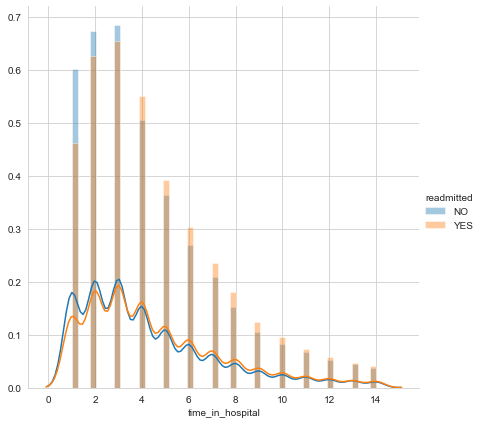

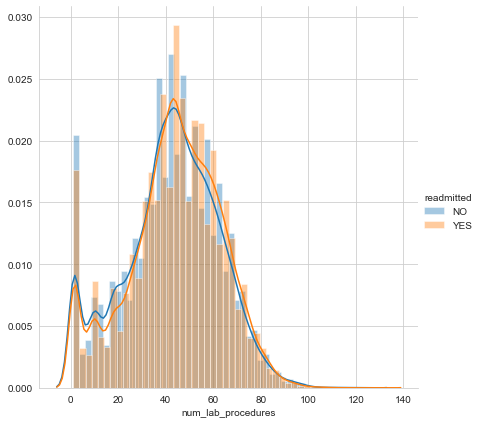

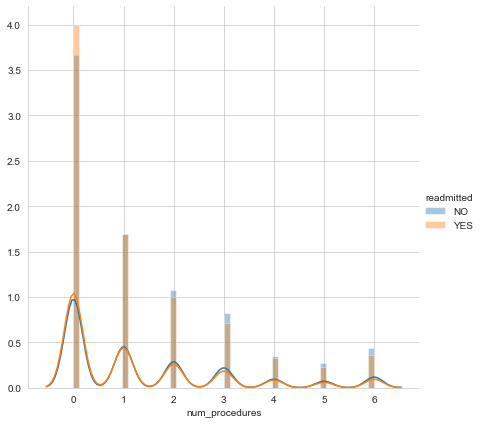

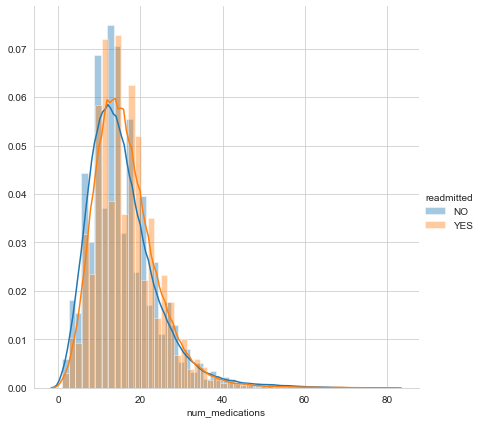

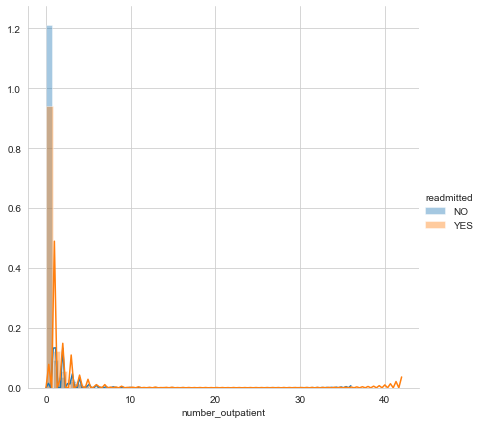

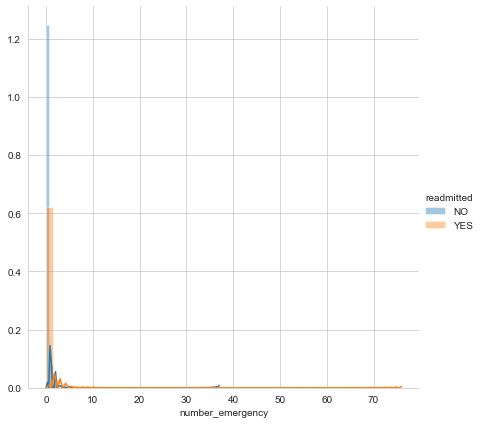

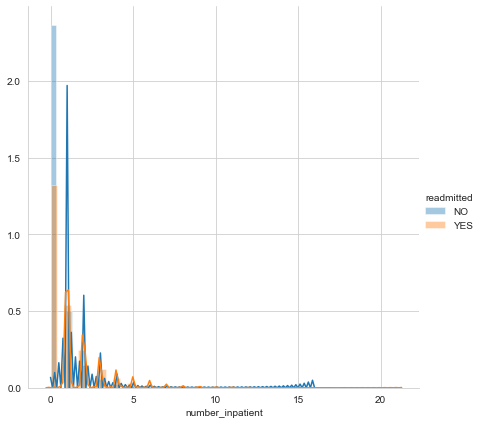

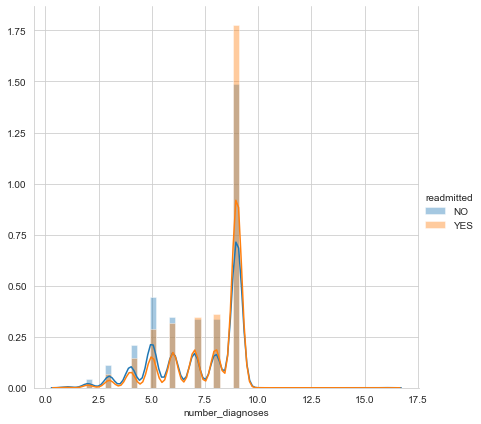

In [31]:

# NOTE Univariate analysis of some numerical attributes

for a_num_feature in diabetic_patient_data_num_features:
    sns.FacetGrid(diabetic_patient_data, hue='readmitted', height=6).map(sns.distplot, a_num_feature).add_legend()
    plt.show()




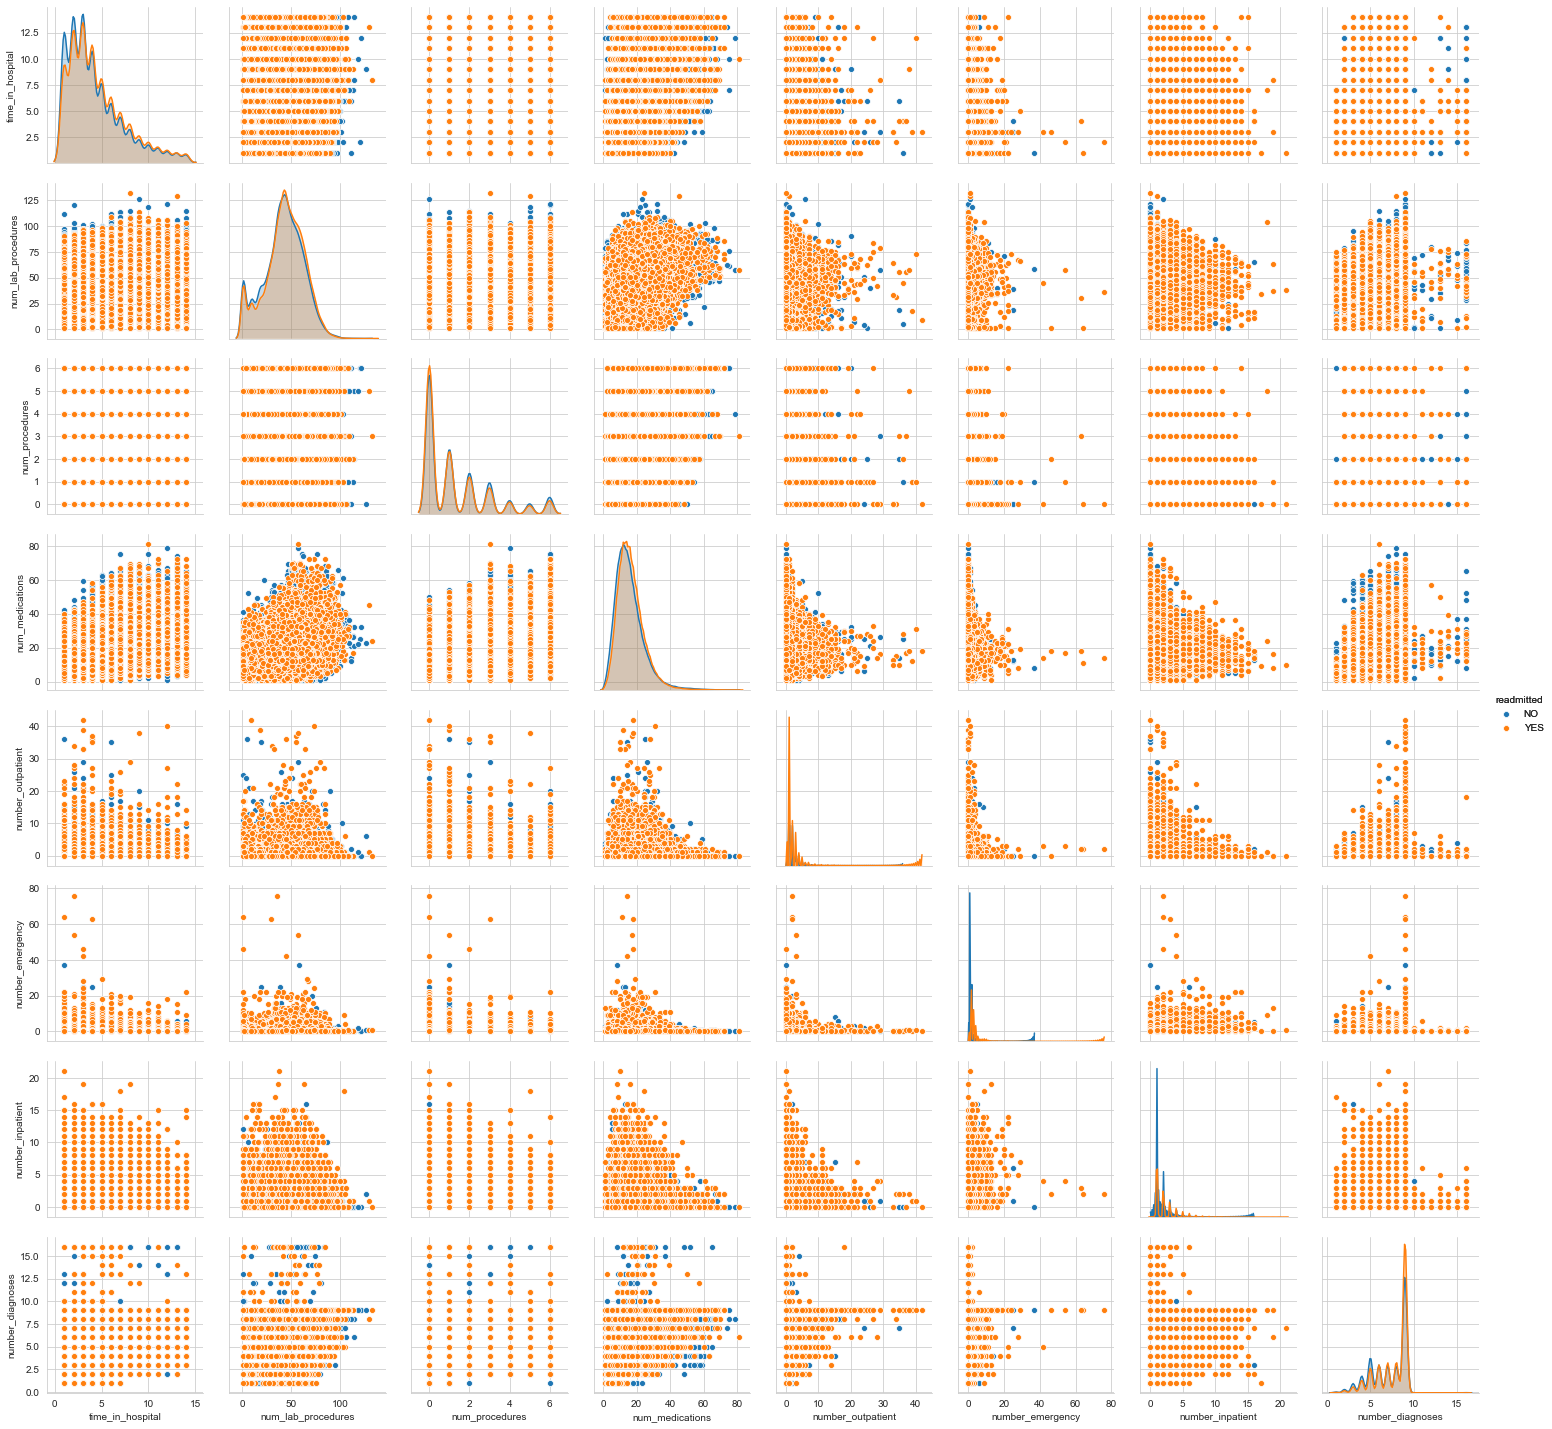

In [32]:
# NOTE Bivariate analysis of some numerical attributes

# Pairplot

diabetic_patient_data_num_features = [
    # 'encounter_id',  # TODO can drop
    # 'patient_nbr',  # TODO can drop
    # 'admission_type_id',  # NOTE cat-encoded
    # 'discharge_disposition_id',  # NOTE cat-encoded
    # 'admission_source_id',  # NOTE cat-encoded
    'readmitted',  # NOTE  add this for using with hue
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses']

diabetic_patient_data_num_features_df = diabetic_patient_data[diabetic_patient_data_num_features]
sns.pairplot(diabetic_patient_data_num_features_df, hue='readmitted').add_legend()
plt.show()


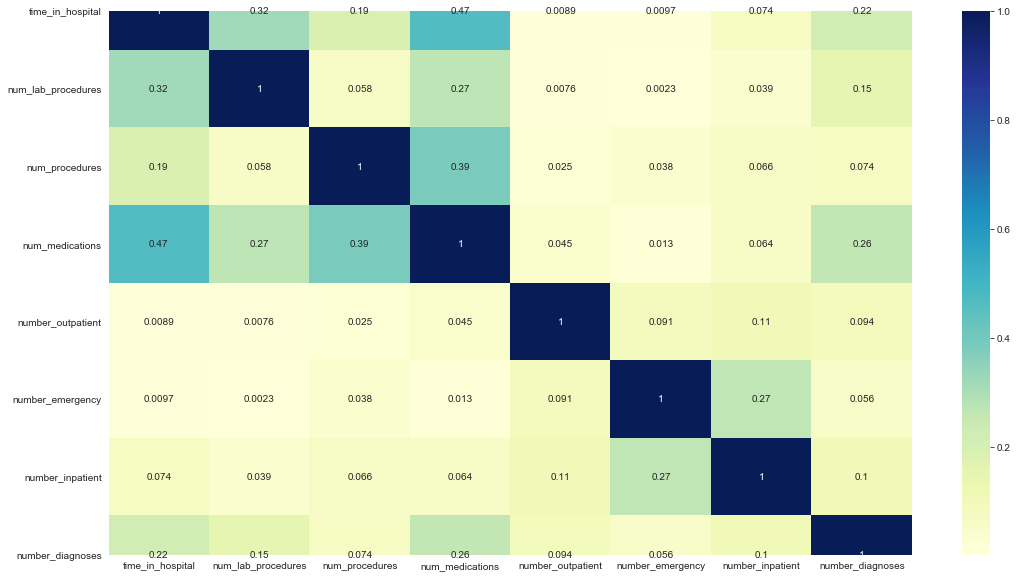

In [35]:

# # Create correlation matrix
corr_matrix = diabetic_patient_data_num_features_df.corr().abs()



# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()




In [37]:

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.60)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))


HIGHLY CORRELATED FEATURES IN DATA SET:0

[]


In [16]:

# TODO
"""
Perform basic data exploration for some categorical attributes
"""

diabetic_patient_data_cat_features = ['race',
                                      'gender',
                                      'age',  # TODO find out how to deal with these age ranges
                                      # 'medical_specialty',  # TODO  find out how to deal with this
                                      # 'diag_1',  # NOTE cat-encoded
                                      # 'diag_2',  # NOTE cat-encoded
                                      # 'diag_3',  # NOTE cat-encoded
                                      'max_glu_serum',  # NOTE has low variance
                                      'A1Cresult',
                                      # diabetes-med-start # TODO these could be dropped or encoded in 0 or 1
                                      'metformin',
                                      'repaglinide',
                                      'nateglinide',
                                      'chlorpropamide',
                                      'glimepiride',
                                      'acetohexamide',
                                      'glipizide',
                                      'glyburide',
                                      'tolbutamide',
                                      'pioglitazone',
                                      'rosiglitazone',
                                      'acarbose',
                                      'miglitol',
                                      'troglitazone',
                                      'tolazamide',
                                      'examide',
                                      'citoglipton',
                                      'insulin',
                                      'glyburide-metformin',
                                      'glipizide-metformin',
                                      'glimepiride-pioglitazone',
                                      'metformin-rosiglitazone',
                                      'metformin-pioglitazone',
                                      # diabetes-med-end
                                      'change',
                                      'diabetesMed',
                                      # 'readmitted'
                                      ]

# for a_med in [
#     'metformin',
#     'repaglinide',
#     'nateglinide',
#     'chlorpropamide',
#     'glimepiride',
#     'acetohexamide',
#     'glipizide',
#     'glyburide',
#     'tolbutamide',
#     'pioglitazone',
#     'rosiglitazone',
#     'acarbose',
#     'miglitol',
#     'troglitazone',
#     'tolazamide',
#     'examide',
#     'citoglipton',
#     'insulin',
#     'glyburide-metformin',
#     'glipizide-metformin',
#     'glimepiride-pioglitazone',
#     'metformin-rosiglitazone',
#     'metformin-pioglitazone']:
#     print(diabetic_patient_data[a_med].value_counts())


for a_cat_feat in diabetic_patient_data_cat_features:
    print(diabetic_patient_data[a_cat_feat].value_counts().count())
    print(diabetic_patient_data[a_cat_feat].value_counts())
    print_ln()


5
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
-------------------------------------------------------------------------------- 

3
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
-------------------------------------------------------------------------------- 

10
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
-------------------------------------------------------------------------------- 

4
None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64
-------------------------------------------------------------------------------- 

4
None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64
-------------------------

### Checking whether data is imbalanced or not wrt target variable


In [46]:
readmitted_df = diabetic_patient_data["readmitted"].value_counts()

readmitted_df

NO     54864
YES    46902
Name: readmitted, dtype: int64

In [47]:
diabetic_patient_data_rate = readmitted_df[1] / (readmitted_df[1] + readmitted_df[0])
diabetic_patient_data_rate


0.4608808442898414

In [48]:
print("Total readmission Count     = {}".format(readmitted_df[1]))
print("Total Non-readmission Count = {}".format(readmitted_df[0]))
print("Readmission Rate            = {:.2f}%".format(diabetic_patient_data_rate*100))
print_ln()


Total readmission Count     = 46902
Total Non-readmission Count = 54864
Readmission Rate            = 46.09%
-------------------------------------------------------------------------------- 



## Data Preparation

In [17]:

# TODO
"""
Create dummy variables for categorical ones.
"""

# NOTE only encode variables which are non-binary

diabetic_patient_data_cat_features_df = diabetic_patient_data[diabetic_patient_data_cat_features]
diabetic_patient_data_cat_features_dummies_df = pd.get_dummies(diabetic_patient_data_cat_features_df, drop_first=True)
diabetic_patient_data_cat_features_dummies_df


,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
5,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
8,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [18]:
# TODO
"""
Scale numeric attributes 
"""

# scaling the features
from sklearn.preprocessing import scale

#
# # storing column names in cols, since column names are (annoyingly) lost after
# # scaling (the df is converted to a numpy array)
# cols = X.columns
# X = pd.DataFrame(scale(X))
# X.columns = cols
# X.columns


## Model Building

In [19]:

# TODO
"""
Divide your data into training and testing dataset
"""

# # split into train and test
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.7,
#                                                     test_size=0.3, random_state=100)


'\nDivide your data into training and testing dataset\n'

In [20]:
# TODO
"""
Train and compare the performance of at least two machine learning algorithms and decide which one to use for predicting risk of readmission for the patient.
Show important feature for each model is calculated.
"""

# This seems like a classification problem. And I'll rely on two models
# - Decision tree
# - Logistic regression


'\nTrain and compare the performance of at least two machine learning algorithms and decide which one to use for predicting risk of readmission for the patient.\nShow important feature for each model is calculated.\n'

In [21]:
# TODO
"""
Use trained model to stratify your population into 3 risk buckets:

- High risk (Probability of readmission >0.7)
- Medium risk (0.3 < Probability of readmission < 0.7)
- Low risk (Probability of readmission < 0.3)
"""

'\nUse trained model to stratify your population into 3 risk buckets:\n\n- High risk (Probability of readmission >0.7)\n- Medium risk (0.3 < Probability of readmission < 0.7)\n- Low risk (Probability of readmission < 0.3)\n'